## Classificação - Respondendo a pergunta 3: Uma música ou artista influencia similares a subirem no  top 100?

Avaliação utilizando KNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report


In [2]:
df_with_one_hot = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

In [3]:
#define X e Y de treino e teste

train, test = train_test_split(df_with_one_hot, test_size=0.40)

X_train = train[['pop', 'dance pop', 'pop rap',
       'rap', 'post-teen pop', 'hip hop', 'r&b', 'contemporary country',
       'southern hip hop', 'country', 'country road', 'urban contemporary',
       'hip pop', 'trap music', 'weeks', 'rank', 'tempo', 'speechiness', 'acousticness',
       'loudness',
       'valence', 'mode']]
X_test = test[['pop', 'dance pop', 'pop rap',
       'rap', 'post-teen pop', 'hip hop', 'r&b', 'contemporary country',
       'southern hip hop', 'country', 'country road', 'urban contemporary',
       'hip pop', 'trap music', 'weeks', 'rank', 'tempo', 'speechiness', 'acousticness',
       'loudness',
       'valence', 'mode']]

Y_train = train[['peak_pos']]
Y_test = test[['peak_pos']]

In [4]:
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values
Y_test = Y_test.values
Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

In [5]:
#divide em 5 grupos[1[1-20], 2[21-40], 3[41,60], 4[61,80], 5[81,100]]

Y_train = Y_train - 1
Y_train = Y_train // 20
Y_train = Y_train + 1
Y_test = Y_test - 1
Y_test = Y_test // 20
Y_test = Y_test+ 1

In [6]:
skf = StratifiedKFold(n_splits=20, shuffle=True)

In [7]:
fold = 0
best = []
for training, validation in skf.split(X_train, Y_train):
    X_tt = X_train[training]
    y_tt = Y_train[training]
    X_v = X_train[validation]
    y_v = Y_train[validation]
    best_iter = (0, 0)
    for nn in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20]: # Vamos testar tais valores de n
        model = KNeighborsClassifier(n_neighbors=nn)
        model.fit(X_tt, y_tt) # treina no conjunto de treino
        y_pv = model.predict(X_v) # previsões no conjunto de validação
        
        # Resultado com melhor acurácia!
        accuracy = accuracy_score(y_v, y_pv)
        if accuracy > best_iter[0]:
            best_iter = (accuracy, nn)
    
    best.append(best_iter[1])
    fold += 1
    print('Fold-{}, melhor n = {}, acc = {}'.format(fold, best_iter[1], best_iter[0]))

Fold-1, melhor n = 20, acc = 0.5821596244131455
Fold-2, melhor n = 20, acc = 0.6338028169014085
Fold-3, melhor n = 20, acc = 0.5821596244131455
Fold-4, melhor n = 20, acc = 0.5849056603773585
Fold-5, melhor n = 8, acc = 0.6037735849056604
Fold-6, melhor n = 8, acc = 0.6037735849056604
Fold-7, melhor n = 20, acc = 0.6161137440758294
Fold-8, melhor n = 8, acc = 0.5687203791469194
Fold-9, melhor n = 7, acc = 0.5592417061611374
Fold-10, melhor n = 20, acc = 0.5761904761904761
Fold-11, melhor n = 20, acc = 0.6142857142857143
Fold-12, melhor n = 6, acc = 0.5502392344497608
Fold-13, melhor n = 5, acc = 0.569377990430622
Fold-14, melhor n = 20, acc = 0.5789473684210527
Fold-15, melhor n = 3, acc = 0.507177033492823
Fold-16, melhor n = 20, acc = 0.5933014354066986
Fold-17, melhor n = 20, acc = 0.5933014354066986
Fold-18, melhor n = 9, acc = 0.5865384615384616
Fold-19, melhor n = 4, acc = 0.5576923076923077
Fold-20, melhor n = 20, acc = 0.5625


In [8]:
intMedian = int(np.median(best))

modelKNN = KNeighborsClassifier(n_neighbors=intMedian)
modelKNN.fit(X_train, Y_train)

print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           1       0.76      0.74      0.75       681
           2       0.39      0.40      0.39       482
           3       0.49      0.42      0.45       558
           4       0.52      0.47      0.50       524
           5       0.69      0.85      0.76       559

    accuracy                           0.59      2804
   macro avg       0.57      0.58      0.57      2804
weighted avg       0.58      0.59      0.58      2804



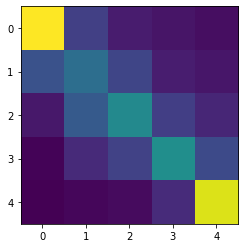

In [9]:
values=np.arange(10)+1

plt.imshow(confusion_matrix(Y_test, modelKNN.predict(X_test)))
